# IMPORTING LIBRARIES

In [1]:
import numpy as np
import pandas as pd
import scipy
import statistics
import matplotlib.pyplot as plt

In [2]:
import shutil

# Creating the original and target file directories.
original = r'/home/dan/Projects/PseudoOnlineTests_for_RTCoG/Scripts/Recent/SpellerPaperSourceCodeFigures/SpellerPaperFigures3And4.ipynb'
target   = r'/mnt/shared/danprocessing/BACKUP/Projects/PseudoOnlineTests_for_RTCoG/Scripts/SpellerPaperFigures3And4.ipynb'

# Saving.
shutil.copyfile(original, target)

'/mnt/shared/danprocessing/BACKUP/Projects/PseudoOnlineTests_for_RTCoG/Scripts/SpellerPaperFigures3And4.ipynb'

# USING PANDAS TO IMPORT SWITCH SCANNER METRICS

In [6]:
# Defining the pathway to the switch scanner metrics.
path_switchscan_metrics = '/home/dan/Projects/ClickDetectorSpeller/Analysis/MainFigures/SourceData/SwitchScanningSpellingMetrics.xlsx'

# Show maximum columns
pd.set_option('display.max_columns', None)

# Importing the excel sheets for 4 vote and 7 vote thresholds.
df_4thr_1000ms = pd.read_excel(path_switchscan_metrics, '4_votes')
df_7thr_1000ms = pd.read_excel(path_switchscan_metrics, '7_votes')

# Extracting only the summary rows for each day.
df_4thr_summary = df_4thr_1000ms.loc[df_4thr_1000ms['Date'].str.contains('Total'),:]
df_7thr_summary = df_7thr_1000ms.loc[df_7thr_1000ms['Date'].str.contains('Total'),:]

# Remove the "_Total" suffix from each date.
df_4thr_summary['Date'] = df_4thr_summary['Date'].str.replace('_Total', '')
df_7thr_summary['Date'] = df_7thr_summary['Date'].str.replace('_Total', '')


/tmp/ipykernel_2989686/1094031536.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_4thr_summary['Date'] = df_4thr_summary['Date'].str.replace('_Total', '')
/tmp/ipykernel_2989686/1094031536.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_7thr_summary['Date'] = df_7thr_summary['Date'].str.replace('_Total', '')


# REORGANIZING SUMMARY METRICS INTO DICTIONARIES

In [7]:

# Extracting the dates from each dataframe.
dates_4thr = df_4thr_summary['Date'].tolist()
dates_7thr = df_7thr_summary['Date'].tolist()

# Initializing the dictionaries for the summary metrics for the 4 vote and 7 vote parameter.
summary_stats_7thr = {}
summary_stats_4thr = {}

# Iterating across all dates using the 4/7 vote voting threshold.
for date in dates_4thr:
        
    # Extracting the sub-dataframe for the current date.
    this_date_df = df_4thr_summary.loc[df_4thr_summary['Date'] == date]       
        
    # Initializing and populating the dictionary for the current date.
    this_date_dict = {}
    this_date_dict['sensitivity_mean']      = this_date_df['Sensitivity (%)']
    this_date_dict['ccpm']                  = this_date_df['Correct CPM']
    this_date_dict['wcpm']                  = this_date_df['Wrong CPM']
    this_date_dict['cwpm']                  = this_date_df['Correct WPM']
    this_date_dict['days_post_training']    = this_date_df['Days Post-Training']
    this_date_dict['fpf_hr']                = this_date_df['FPF ( /hr)']
    this_date_dict['fpf_min']               = this_date_df['FPF ( /min)']
    this_date_dict['mean_latency_BCI2000']  = this_date_df['Mean Latency to BCI2000 (s)']
    this_date_dict['mean_latency_NAVI']     = this_date_df['Mean Latency to NAVI (s)']
    this_date_dict['n_detections']          = this_date_df['N Detections']
    this_date_dict['n_grasps']              = this_date_df['N Grasps']
    this_date_dict['stdev_latency_BCI2000'] = this_date_df['Stdev Latency to BCI2000 (s)']
    this_date_dict['stdev_latency_NAVI']    = this_date_df['Stdev Latency to NAVI (s)']
    this_date_dict['total_time']            = this_date_df['Block Time (s)']
    this_date_dict['tpf_hr']                = this_date_df['TPF ( /hr)']
    this_date_dict['tpf_min']               = this_date_df['TPF ( /min)']
    
    # Populating the Summary Stats dictionary with the current date's information.
    summary_stats_4thr[date] = this_date_dict
    
    
# Iterating across all dates using the 7/7 vote voting threshold.
for date in dates_7thr:
        
    # Extracting the sub-dataframe for the current date.
    this_date_df = df_7thr_summary.loc[df_7thr_summary['Date'] == date]       
        
    # Initializing and populating the dictionary for the current date.
    this_date_dict = {}
    this_date_dict['sensitivity_mean']      = this_date_df['Sensitivity (%)']
    this_date_dict['ccpm']                  = this_date_df['Correct CPM']
    this_date_dict['wcpm']                  = this_date_df['Wrong CPM']
    this_date_dict['cwpm']                  = this_date_df['Correct WPM']
    this_date_dict['days_post_training']    = this_date_df['Days Post-Training']
    this_date_dict['fpf_hr']                = this_date_df['FPF ( /hr)']
    this_date_dict['fpf_min']               = this_date_df['FPF ( /min)']
    this_date_dict['mean_latency_BCI2000']  = this_date_df['Mean Latency to BCI2000 (s)']
    this_date_dict['mean_latency_NAVI']     = this_date_df['Mean Latency to NAVI (s)']
    this_date_dict['n_detections']          = this_date_df['N Detections']
    this_date_dict['n_grasps']              = this_date_df['N Grasps']
    this_date_dict['stdev_latency_BCI2000'] = this_date_df['Stdev Latency to BCI2000 (s)']
    this_date_dict['stdev_latency_NAVI']    = this_date_df['Stdev Latency to NAVI (s)']
    this_date_dict['total_time']            = this_date_df['Block Time (s)']
    this_date_dict['tpf_hr']                = this_date_df['TPF ( /hr)']
    this_date_dict['tpf_min']               = this_date_df['TPF ( /min)']
    
    # Populating the Summary Stats dictionary with the current date's information.
    summary_stats_7thr[date] = this_date_dict


# Creating array for plotting time per block

In [8]:
# Excluding the summary rows.
df_7thr_per_block = df_7thr_1000ms.loc[~df_7thr_1000ms['Date'].str.contains('Total'),:]
df_4thr_per_block = df_4thr_1000ms.loc[~df_4thr_1000ms['Date'].str.contains('Total'),:]

# Extracting only rows relevant to number of hours and blocks per session.
df_7thr_per_block = df_7thr_per_block[['Days Post-Training', 'Block', 'Block Time (s)']]
df_4thr_per_block = df_4thr_per_block[['Days Post-Training', 'Block', 'Block Time (s)']]

# Extracting the block order over multiple sessions.
block_list_7thr = np.asarray(df_7thr_per_block['Block']).astype(float)
block_list_4thr = np.asarray(df_4thr_per_block['Block']).astype(float)

# Extracting the block times across all sessions.
blocktime_list_7thr = np.asarray(df_7thr_per_block['Block Time (s)']).astype(float)/60
blocktime_list_4thr = np.asarray(df_4thr_per_block['Block Time (s)']).astype(float)/60

# For each block day post-final training block.
day_list_7thr = np.asarray(df_7thr_per_block['Days Post-Training']).astype(float)
day_list_4thr = np.asarray(df_4thr_per_block['Days Post-Training']).astype(float)

# Combining block information across sessions using 7-vote and 4-vote thresholds.
blocktime_list_comb = np.concatenate((blocktime_list_7thr, blocktime_list_4thr), axis = 0)
block_list_comb     = np.concatenate((block_list_7thr, block_list_4thr), axis = 0)
day_list_comb       = np.concatenate((day_list_7thr, day_list_4thr), axis = 0)

# Adding data from communication board usage (10/14/2023): 11 min, 23 sec = 683 sec
blocktime_list_comb = np.concatenate((np.array([683])/60 , blocktime_list_comb), axis=0)
block_list_comb     = np.concatenate((np.array([1]), block_list_comb), axis = 0)
day_list_comb       = np.concatenate((np.array([21]), day_list_comb), axis = 0)

# Adding data from training days. Already in minutes
training_blocktimes = np.array([3.773, 3.844, 3.724, 14.091, 9.072, 9.425])
training_blocks     = np.array([1, 1, 2, 1, 1, 2])
training_days       = np.array([-15,-14,-14,-1,0,0])
blocktime_list_comb = np.concatenate((training_blocktimes , blocktime_list_comb), axis=0)
block_list_comb     = np.concatenate((training_blocks, block_list_comb), axis = 0)
day_list_comb       = np.concatenate((training_days, day_list_comb), axis = 0)

# Computing unique days.
unique_days   = np.unique(day_list_comb).astype(int)
n_unique_days = unique_days.shape[0]

# Initializing the array which will hold block times over all sessions.
n_max_blocks = int(max(block_list_comb))
block_array  = np.zeros((n_unique_days, n_max_blocks))

# Iterating across all days.
for n, day in enumerate(unique_days):
    col = 0
    day_inds = np.argwhere(day_list_comb == day) 
    for day_ind in day_inds:
        day_ind = day_ind[0]
        block_array[n, col] = blocktime_list_comb[day_ind]
        col += 1
block_array = block_array.transpose()

# Plotting Figure 3

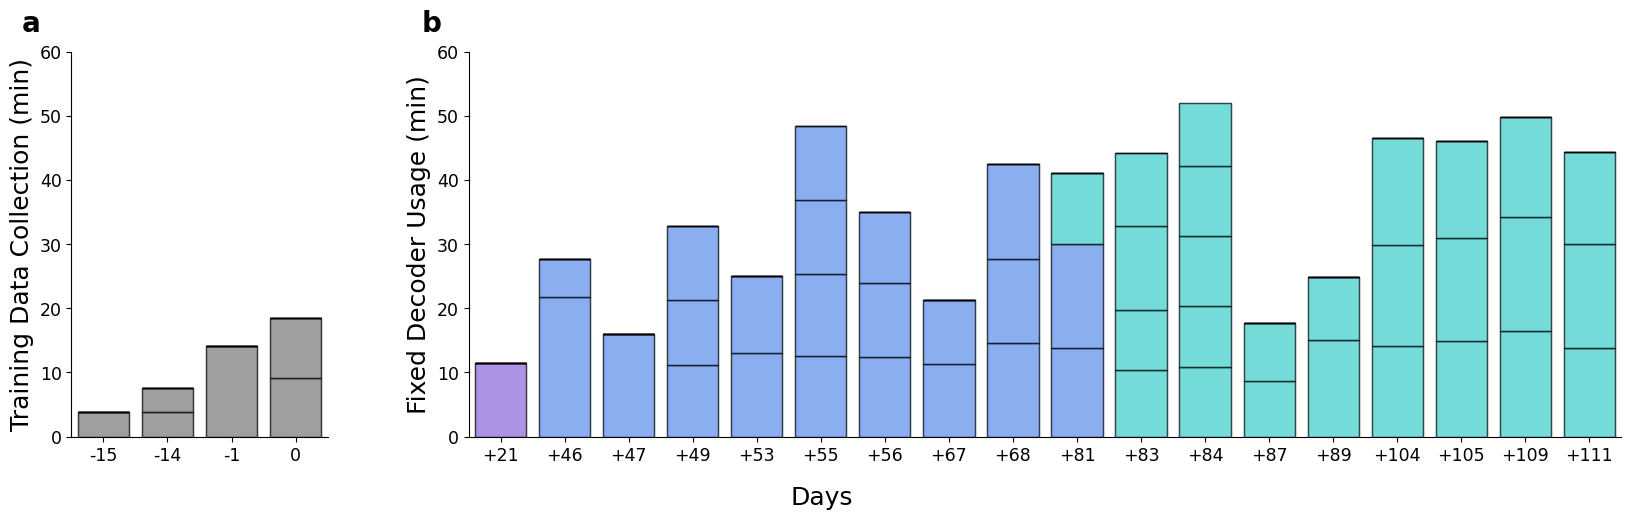

In [9]:
# EXPERIMNETER INPUTS:
color_trianing  = 'grey'
color_commboard = 'mediumpurple'
color_7thr      = 'cornflowerblue'
color_4thr      = 'mediumturquoise'
color_lowperf   = 'lightcoral'
save_fig        = False

# Initializing figure.
fig1, ax = plt.subplots(1,2, figsize = (20,5), width_ratios=[4,18])

# Bar plot for every day.
for n, day in enumerate(unique_days):

    # Initializing the bar height for the current day.
    this_day_bar_value = 0
    
    # Multiple bars for each day.
    for b in range(block_array.shape[0]):
        if (b+1 == 1) and (day == -15):
            my_color = color_trianing
            axis = 0
        if (b+1 == 1) and (day == 21):
            my_color = color_commboard
            axis = 1
        if (b+1 == 1) and (day == 46):
            my_color = color_7thr
        if (b+1 == 3) and (day == 81):
            my_color = color_4thr
        if (b+1 == 1) and (day == 118):
            my_color = color_lowperf
        
        this_new_value = block_array[b,n]
        ax[axis].bar(n, this_new_value, bottom = this_day_bar_value, color = my_color, edgecolor='black', zorder = 2, alpha = 0.5)
        ax[axis].bar(n, this_new_value, bottom = this_day_bar_value, color = my_color, edgecolor='black', zorder = 2, alpha = 0.5)
        
        # Icreasing
        this_day_bar_value += this_new_value

        
ax[0].set_yticks(np.arange(0,70,10))  
ax[0].set_ylabel('Training Data Collection (min)', fontsize=18)
ax[0].spines[['right','top']].set_visible(False)
ax[0].set_xticks(np.arange(n_unique_days));
ax[0].set_xlim([-0.5,3.5])

ax[1].set_yticks(np.arange(0,70,10))      
ax[1].set_ylabel('Fixed Decoder Usage (min)', fontsize=18)
ax[1].spines[['right','top']].set_visible(False)

ax[1].set_xticks(np.arange(n_unique_days));
ax[1].set_xlim([3.50,21.5])

unique_days_str = unique_days.astype(str)
for n, day_str in enumerate(unique_days_str[4:]):
    unique_days_str[4+n] = '+' + day_str 
    
ax[0].set_xticklabels(unique_days_str, fontsize=12.5);
ax[1].set_xticklabels(unique_days_str, fontsize=12.5);
ax[0].set_yticklabels(np.arange(0,70,10).astype(str), fontsize=12.5);
ax[1].set_yticklabels(np.arange(0,70,10).astype(str), fontsize=12.5);

fig1.text(0.5, -0.025, 'Days', ha='center', fontsize=18)

# Subfigure labels.
fig1.text(0.1, 0.92, 
         'a', 
         style = 'normal',
         fontsize = 20,
         color = "black",
         weight='bold')
fig1.text(0.30, 0.92, 
         'b', 
         style = 'normal',
         fontsize = 20,
         color = "black",
         weight='bold')

# Saving Figures. 
if save_fig:
    fig1.savefig('LongTermUseFigure.jpg', bbox_inches = 'tight', dpi=1000)
    fig1.savefig('LongTermUseFigure.svg', format = 'svg', bbox_inches='tight', dpi = 2000)

# Plotting Figure 4

Sensitivity:
Median Sensitivity (7-vote threshold):  94.9685534591195
Median Sensitivity (4-vote threshold):  97.80405405405406



TPF and FPF:
Median TPF (7-vote threshold):  10.671855748549406
Median FPF (7-vote threshold):  0.028537156805017977
Median TPF (4-vote threshold):  11.596727748543156
Median FPF (4-vote threshold):  0.10053700163808289



Latencies:
Median BCI2K Latency (7-vote threshold):  0.748
Median NAVI Latency (7-vote threshold):  0.899
Median BCI2K Latency (4-vote threshold):  0.477
Median NAVI Latency (4-vote threshold):  0.682



CCPM and WCPM:
Median CCPM (7-vote threshold):  9.07048843925958
Median WCPM (7-vote threshold):  0.18846544368299173
Median CCPM (4-vote threshold):  10.195902401487706
Median WCPM (4-vote threshold):  0.11314115679290077



CWPM:
Median CWPM (7-vote threshold):  1.8549151923261684
Median CWPM (4-vote threshold):  2.1353682388021418





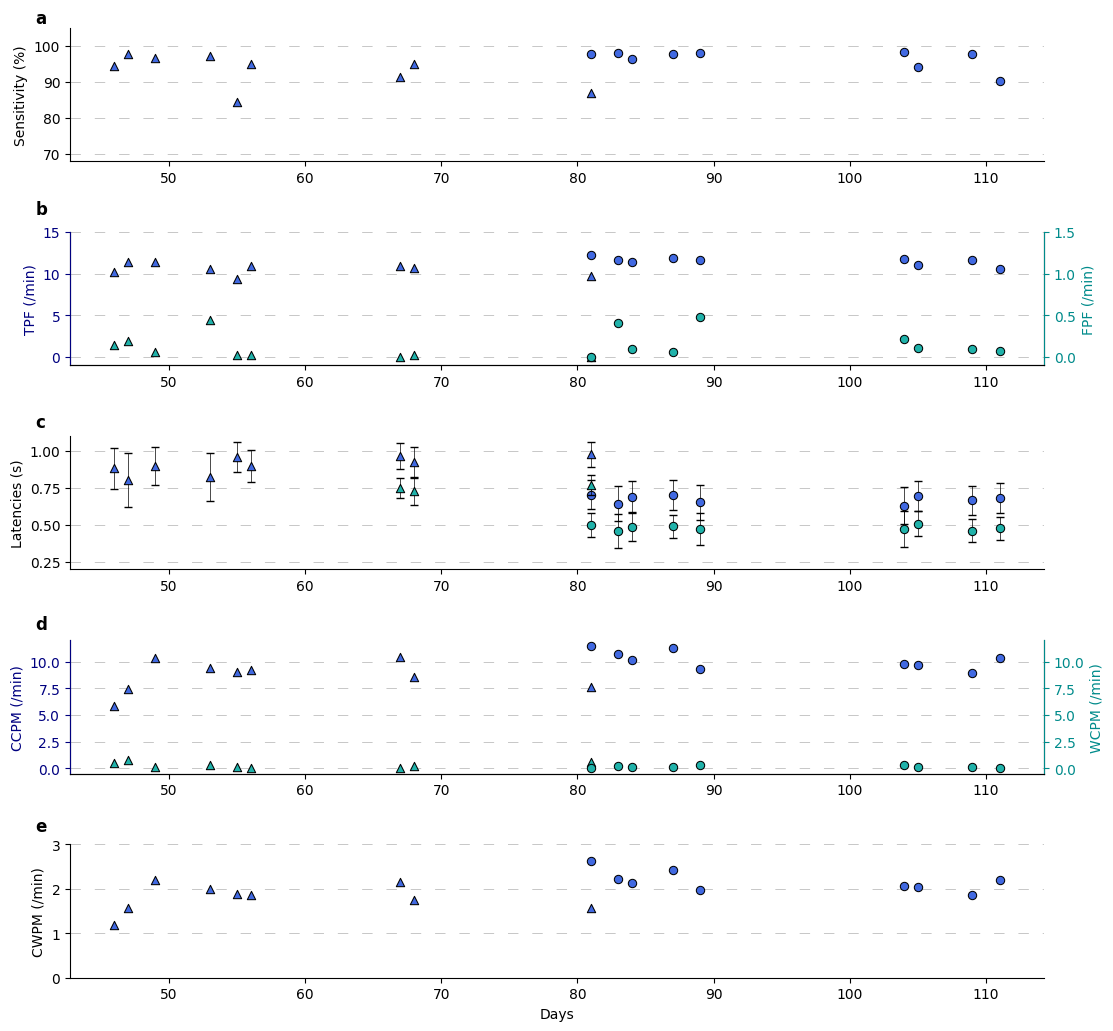

In [11]:

# EXPERIMENTER INPUTS:
color1a   = 'navy' # blue
color1b   = 'royalblue' #cornflowerblue
color2a   = 'darkcyan' # green
color2b   = 'lightseagreen' # lightgreen
marker1   = 'o'
marker2   = '^'
save_figs = False


# Extracting performance metrics for plotting.
days_post_training_7thr  = np.asarray(df_7thr_summary['Days Post-Training']).astype(float)
tpf_7thr                 = np.asarray(df_7thr_summary['TPF ( /min)']).astype(float)
fpf_7thr                 = np.asarray(df_7thr_summary['FPF ( /min)']).astype(float)
sensitivity_mean_7thr    = np.asarray(df_7thr_summary['Sensitivity (%)']).astype(float)
mean_latency_BCI2K_7thr  = np.asarray(df_7thr_summary['Mean Latency to BCI2000 (s)'].values[6:]).astype(float)
mean_latency_NAVI_7thr   = np.asarray(df_7thr_summary['Mean Latency to NAVI (s)'].values).astype(float)
stdev_latency_BCI2K_7thr = np.asarray(df_7thr_summary['Stdev Latency to BCI2000 (s)'].values[6:]).astype(float)
stdev_latency_NAVI_7thr  = np.asarray(df_7thr_summary['Stdev Latency to NAVI (s)'].values).astype(float)
ccpm_7thr                = np.asarray(df_7thr_summary['Correct CPM']).astype(float)
wcpm_7thr                = np.asarray(df_7thr_summary['Wrong CPM']).astype(float)
cwpm_7thr                = np.asarray(df_7thr_summary['Correct WPM']).astype(float)
days_post_training_4thr  = np.asarray(df_4thr_summary['Days Post-Training']).astype(float)
tpf_4thr                 = np.asarray(df_4thr_summary['TPF ( /min)']).astype(float)
fpf_4thr                 = np.asarray(df_4thr_summary['FPF ( /min)']).astype(float)
sensitivity_mean_4thr    = np.asarray(df_4thr_summary['Sensitivity (%)']).astype(float)
mean_latency_BCI2K_4thr  = np.asarray(df_4thr_summary['Mean Latency to BCI2000 (s)'].values).astype(float)
mean_latency_NAVI_4thr   = np.asarray(df_4thr_summary['Mean Latency to NAVI (s)'].values).astype(float)
stdev_latency_BCI2K_4thr = np.asarray(df_4thr_summary['Stdev Latency to BCI2000 (s)'].values).astype(float)
stdev_latency_NAVI_4thr  = np.asarray(df_4thr_summary['Stdev Latency to NAVI (s)'].values).astype(float)
ccpm_4thr                = np.asarray(df_4thr_summary['Correct CPM']).astype(float)
wcpm_4thr                = np.asarray(df_4thr_summary['Wrong CPM']).astype(float)
cwpm_4thr                = np.asarray(df_4thr_summary['Correct WPM']).astype(float)






# Initializing figure.
# fig, ax = plt.subplots(5,1, figsize=(11,8.5))
fig, ax = plt.subplots(5,1, figsize=(11,10.625))
fig.tight_layout(pad=3)

# ROW 1: SENSITIVITY
ax[0].grid(axis='y', linestyle='dashed', dashes=(15, 20), linewidth=0.5)
ax[0].scatter(days_post_training_7thr, sensitivity_mean_7thr, color = color1b, edgecolors='black', linewidths=0.75, marker=marker2, zorder=2)
ax[0].scatter(days_post_training_4thr, sensitivity_mean_4thr, color = color1b, edgecolors='black', linewidths=0.75, marker=marker1, zorder=2)
ax[0].set_yticks(np.arange(70,101,10)) 
ax[0].set_ylim([68, 105])
ax[0].set_ylabel('Sensitivity (%)')
ax[0].spines[['right', 'top']].set_visible(False)
ax[0].yaxis.label.set_color('k') 
ax[0].tick_params(axis='y', colors='k')
ax[0].spines['left'].set_color('k') 
print('Sensitivity:')
print('Median Sensitivity (7-vote threshold): ', statistics.median(sensitivity_mean_7thr))
print('Median Sensitivity (4-vote threshold): ', statistics.median(sensitivity_mean_4thr))
print('\n\n')


# ROW 2: TPF and FPF
ax[1].grid(axis='y', linestyle='dashed', dashes=(15, 20), linewidth=0.5)
ax[1].scatter(days_post_training_7thr, tpf_7thr, color = color1b, edgecolors='black', linewidths=0.75, marker=marker2, zorder=2)
ax[1].scatter(days_post_training_4thr, tpf_4thr, color = color1b, edgecolors='black', linewidths=0.75, marker=marker1, zorder=2)
ax[1].set_ylabel('TPF (/min)')
ax[1].set_yticks(np.array([0,5, 10, 15])) 
ax[1].set_ylim([-1, 15])
ax[1].yaxis.label.set_color(color1a) 
ax[1].tick_params(axis='y', colors=color1a)
ax[1].spines[['top']].set_visible(False)
ax1a = ax[1].twinx()  
ax1a.scatter(days_post_training_7thr, fpf_7thr, color = color2b, edgecolors='black', linewidths=0.75, marker=marker2, zorder=2)
ax1a.scatter(days_post_training_4thr, fpf_4thr, color = color2b, edgecolors='black', linewidths=0.75, marker=marker1, zorder=2)
ax1a.set_ylabel('FPF (/min)')
ax1a.set_yticks(np.array([0, 0.5, 1, 1.5])) 
ax1a.set_ylim([-0.1, 1.5])
ax1a.spines['right'].set_color(color2a) 
ax1a.spines['left'].set_color(color1a) 
ax1a.yaxis.label.set_color(color2a) 
ax1a.tick_params(axis='y', colors=color2a)
ax1a.spines[['top']].set_visible(False)
print('TPF and FPF:')
print('Median TPF (7-vote threshold): ', statistics.median(tpf_7thr))
print('Median FPF (7-vote threshold): ', statistics.median(fpf_7thr))
print('Median TPF (4-vote threshold): ', statistics.median(tpf_4thr))
print('Median FPF (4-vote threshold): ', statistics.median(fpf_4thr))
print('\n\n')


# ROW 3: BCI2000 AND NAVI LATENCIES
ax[2].grid(axis='y', linestyle='dashed', dashes=(15, 20), linewidth=0.5)
ax[2].errorbar(days_post_training_7thr, mean_latency_NAVI_7thr, yerr=stdev_latency_NAVI_7thr, linestyle="None", color='black', zorder=2, linewidth=0.5, capsize = 3)
ax[2].scatter(days_post_training_7thr, mean_latency_NAVI_7thr, color = color1b, edgecolors='black', marker=marker2, linewidths=0.75, zorder=2)
ax[2].errorbar(days_post_training_4thr, mean_latency_NAVI_4thr, yerr=stdev_latency_NAVI_4thr, linestyle="None", color='black', zorder=2, linewidth=0.5, capsize = 3)
ax[2].scatter(days_post_training_4thr, mean_latency_NAVI_4thr, color = color1b, edgecolors='black', marker=marker1, linewidths=0.75, zorder=2)
ax[2].errorbar(days_post_training_7thr[6:], mean_latency_BCI2K_7thr, yerr=stdev_latency_BCI2K_7thr, linestyle="None", color='black', zorder=2, linewidth=0.5, capsize = 3)
ax[2].scatter(days_post_training_7thr[6:], mean_latency_BCI2K_7thr, color = color2b, edgecolors='black', marker=marker2, linewidths=0.75, zorder=2)
ax[2].errorbar(days_post_training_4thr, mean_latency_BCI2K_4thr, yerr=stdev_latency_BCI2K_4thr, linestyle="None", color='black', zorder=2, linewidth=0.5, capsize = 3)
ax[2].scatter(days_post_training_4thr, mean_latency_BCI2K_4thr, color = color2b, edgecolors='black', marker=marker1, linewidths=0.75, zorder=2)
ax[2].set_ylabel('Latencies (s)')
ax[2].set_yticks(np.array([0.25, 0.5, 0.75, 1])) 
ax[2].set_ylim([0.20, 1.1])
ax[2].tick_params(axis='y', colors='k')
ax[2].spines[['top','right']].set_visible(False)
ax[2].yaxis.label.set_color('k') 
print('Latencies:')
print('Median BCI2K Latency (7-vote threshold): ', statistics.median(mean_latency_BCI2K_7thr))
print('Median NAVI Latency (7-vote threshold): ', statistics.median(mean_latency_NAVI_7thr))
print('Median BCI2K Latency (4-vote threshold): ', statistics.median(mean_latency_BCI2K_4thr))
print('Median NAVI Latency (4-vote threshold): ', statistics.median(mean_latency_NAVI_4thr))
print('\n\n')


# ROW 4: CCPM and WCPM (Correct and Wrong character per min)
ax[3].grid(axis='y', linestyle='dashed', dashes=(15, 20), linewidth=0.5)
ax[3].scatter(days_post_training_7thr, ccpm_7thr, color = color1b, edgecolors='black', linewidths=0.75, marker=marker2, zorder=2)
ax[3].scatter(days_post_training_4thr, ccpm_4thr, color = color1b, edgecolors='black', linewidths=0.75, marker=marker1, zorder=2)
ax[3].set_ylabel('CCPM (/min)')
ax[3].set_yticks(np.arange(0,15,2.5)) 
ax[3].set_ylim([-0.5, 12])
ax[3].yaxis.label.set_color(color1a) 
ax[3].tick_params(axis='y', colors=color1a)
ax[3].spines[['top']].set_visible(False)
ax3a = ax[3].twinx()  
ax3a.scatter(days_post_training_7thr, wcpm_7thr, color = color2b, edgecolors='black', linewidths=0.75, marker=marker2, zorder=2)
ax3a.scatter(days_post_training_4thr, wcpm_4thr, color = color2b, edgecolors='black', linewidths=0.75, marker=marker1, zorder=2)
ax3a.set_ylabel('WCPM (/min)')
ax3a.set_yticks(np.arange(0,15,2.5))
ax3a.set_ylim([-0.5, 12])
ax3a.spines['right'].set_color(color2a) 
ax3a.spines['left'].set_color(color1a) 
ax3a.yaxis.label.set_color(color2a) 
ax3a.tick_params(axis='y', colors=color2a)
ax3a.spines[['top']].set_visible(False)
print('CCPM and WCPM:')
print('Median CCPM (7-vote threshold): ', statistics.median(ccpm_7thr))
print('Median WCPM (7-vote threshold): ', statistics.median(wcpm_7thr))
print('Median CCPM (4-vote threshold): ', statistics.median(ccpm_4thr))
print('Median WCPM (4-vote threshold): ', statistics.median(wcpm_4thr))
print('\n\n')


# ROW 5: CWPM (Correct words per min)
ax[4].grid(axis='y', linestyle='dashed', dashes=(15, 20), linewidth=0.5)
ax[4].scatter(days_post_training_7thr, cwpm_7thr, color = color1b, edgecolors='black', linewidths=0.75, marker=marker2, zorder=2)
ax[4].scatter(days_post_training_4thr, cwpm_4thr, color = color1b, edgecolors='black', linewidths=0.75, marker=marker1, zorder=2)
ax[4].set_ylabel('CWPM (/min)')
ax[4].set_yticks(np.arange(0,3.1,1)) 
ax[4].set_ylim([0, 3])
ax[4].tick_params(axis='y', colors='k')
ax[4].spines[['top', 'right']].set_visible(False)
ax[4].set_xlabel('Days')
print('CWPM:')
print('Median CWPM (7-vote threshold): ', statistics.median(cwpm_7thr))
print('Median CWPM (4-vote threshold): ', statistics.median(cwpm_4thr))
print('\n\n')



# Subfigure labels.
fig.text(0.035, 0.96, 
         'a', 
         style = 'normal',
         fontsize = 12,
         color = "black",
         weight = 'bold')
fig.text(0.035, 0.78, 
         'b', 
         style = 'normal',
         fontsize = 12,
         color = "black",
         weight = 'bold')
fig.text(0.035, 0.58, 
         'c', 
         style = 'normal',
         fontsize = 12,
         color = "black",
         weight = 'bold')
fig.text(0.035, 0.39, 
         'd', 
         style = 'normal',
         fontsize = 12,
         color = "black",
         weight = 'bold')
fig.text(0.035, 0.20, 
         'e', 
         style = 'normal',
         fontsize = 12,
         color = "black",
         weight = 'bold')


# Saving Figures.
if save_figs:
    fig.savefig('Performance.jpg', bbox_inches = 'tight', dpi=1000)
    fig.savefig('Performance.svg', format = 'svg', bbox_inches = 'tight', dpi=1000)


# Wilcoxon Rank-Sum Test for Performance Metrics

In [12]:
print('Wilcoxon Rank-Sum (Sensitivity):', scipy.stats.ranksums(sensitivity_mean_7thr, sensitivity_mean_4thr))
print('Wilcoxon Rank-Sum (TPF):', scipy.stats.ranksums(tpf_7thr, tpf_4thr))
print('Wilcoxon Rank-Sum (FPF):', scipy.stats.ranksums(fpf_7thr, fpf_4thr))
print('Wilcoxon Rank-Sum (Latency BCI2000):', scipy.stats.ranksums(mean_latency_BCI2K_7thr, mean_latency_BCI2K_4thr))
print('Wilcoxon Rank-Sum (Latency NAVI):', scipy.stats.ranksums(mean_latency_NAVI_7thr, mean_latency_NAVI_4thr))
print('Wilcoxon Rank-Sum (CCPM):', scipy.stats.ranksums(ccpm_7thr, ccpm_4thr))
print('Wilcoxon Rank-Sum (WCPM):', scipy.stats.ranksums(wcpm_7thr, wcpm_4thr))
print('Wilcoxon Rank-Sum (CWPM):', scipy.stats.ranksums(cwpm_7thr, cwpm_4thr))

Wilcoxon Rank-Sum (Sensitivity): RanksumsResult(statistic=-1.898496378459896, pvalue=0.05763072439476858)
Wilcoxon Rank-Sum (TPF): RanksumsResult(statistic=-2.781517949836592, pvalue=0.005410533856084873)
Wilcoxon Rank-Sum (FPF): RanksumsResult(statistic=-1.280381278496209, pvalue=0.20041107494054256)
Wilcoxon Rank-Sum (Latency BCI2000): RanksumsResult(statistic=2.496150883013531, pvalue=0.012554918596966547)
Wilcoxon Rank-Sum (Latency NAVI): RanksumsResult(statistic=3.5762373640756184, pvalue=0.000348575174213053)
Wilcoxon Rank-Sum (CCPM): RanksumsResult(statistic=-2.163402849872905, pvalue=0.030510208580440113)
Wilcoxon Rank-Sum (WCPM): RanksumsResult(statistic=1.1920791213585393, pvalue=0.2332302227821852)
Wilcoxon Rank-Sum (CWPM): RanksumsResult(statistic=-2.4283093212859135, pvalue=0.015169399414045479)
